In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage import data

from skimage.exposure import rescale_intensity
from skimage.morphology import reconstruction

### Load an external 2D moon image  

By NASA/GSFC/Arizona State University - http://wms.lroc.asu.edu/lroc_browse/view/WAC_GL180 (see also http://photojournal.jpl.nasa.gov/catalog/PIA14021), Public Domain, https://commons.wikimedia.org/w/index.php?curid=14842928

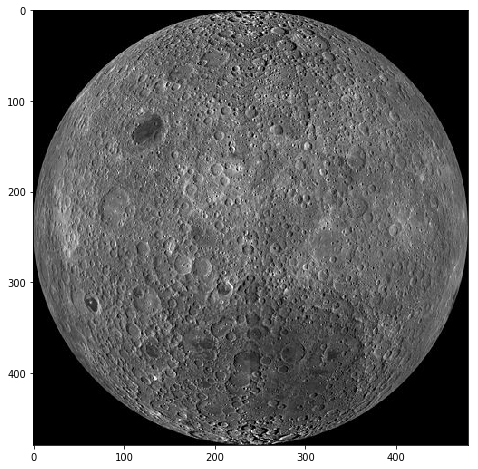

In [12]:
moon = io.imread('./images/moon.jpg')

plt.figure(figsize=(8,8))
plt.imshow(moon, cmap='gray') 

rescale_intensity is used to shrink or expand the intensity range of the image

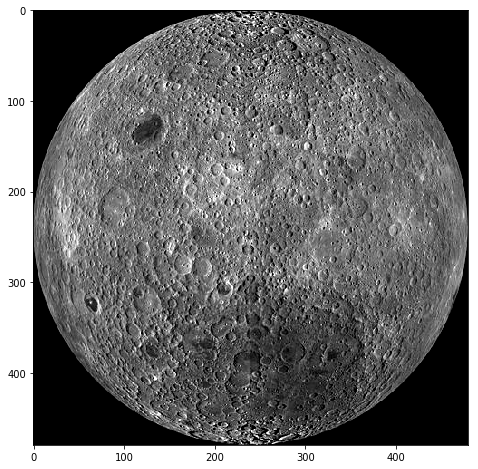

In [13]:
moon_rescaled = rescale_intensity(moon, in_range=(30, 200))

plt.figure(figsize=(8,8))
plt.imshow(moon_rescaled, cmap='gray') 

# Erosion Process

Initialize seed image at max value of original image - all parts of the image except the border has the max value

* Seed image is the maximum possible values of reconstructed image
* Mask is the minimum possible values of reconstructed image
* Border pixels are considered as starting points for erosion process
* Expands the minimum till the mask is encountered
* It erodes away the boundaries of foreground object.
* It removes holes in image because they are surrounded by pixels of brighter intensity 

In [22]:
erosion_seed = np.copy(moon_rescaled)

erosion_seed[1:-1, 1:-1] = moon_rescaled.max() 

mask = moon_rescaled  

In [23]:
filled = reconstruction(erosion_seed, mask, method='erosion')   

Plot the original Image and the resulting image after erosion.

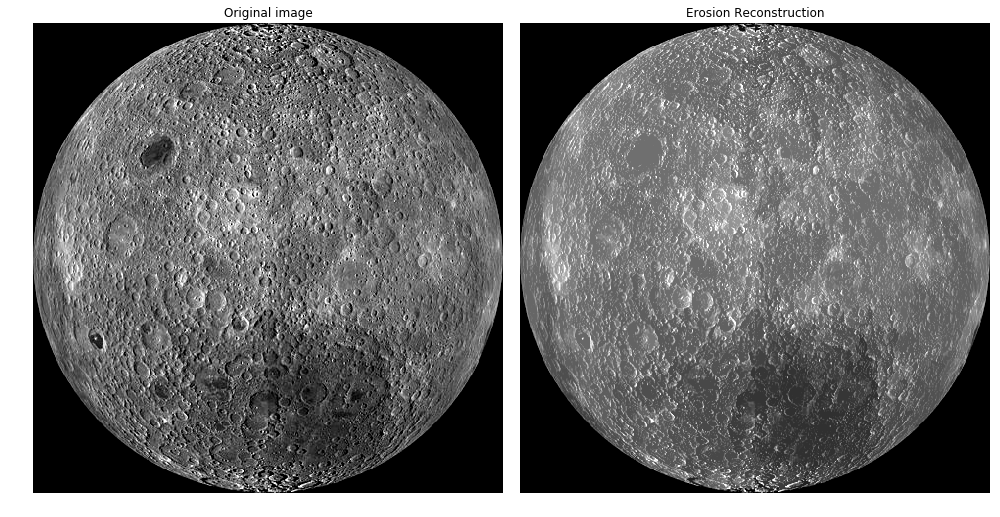

In [20]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(14, 12), 
                       sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(moon_rescaled, cmap='gray')  
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(filled, cmap='gray')   
ax[1].set_title('Erosion Reconstruction')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Dilation Process

Initialize seed image at min value of original image - all parts of the image except the border has the min value

* Seed image is the minimum possible values of reconstructed image
* Mask is the minimum possible values of reconstructed image
* Border pixels are considered as starting points for dilation process
* Expands the maximal values of the seed till the mask is encountered
* It highlights the peaks in the original image

In [25]:
dilation_seed = np.copy(moon_rescaled)

dilation_seed[1:-1, 1:-1] = moon_rescaled.min()

mask = moon_rescaled  

In [26]:
highlighted = reconstruction(dilation_seed, mask, method='dilation')  


Plot the original Image and the resulting image after dilation.

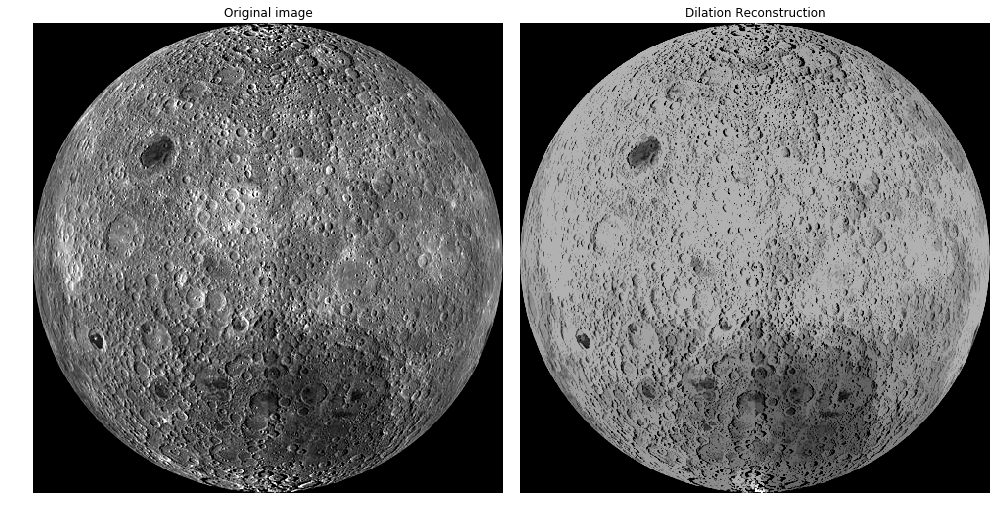

In [27]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(14, 12), 
                       sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(moon_rescaled, cmap='gray') 
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(highlighted, cmap='gray')   
ax[1].set_title('Dilation Reconstruction')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## Find Holes and Peaks in Original Image

<b>To Find Holes:</b>
* Subtract Erosion Reconstruction from original image to show holes (isolate dark region).

<b>To Find Peaks:</b>
* Subtract Dilation Reconstruction from original image to show peaks (isolate light regions).

In [28]:
holes = filled - moon_rescaled

peaks = highlighted - moon_rescaled

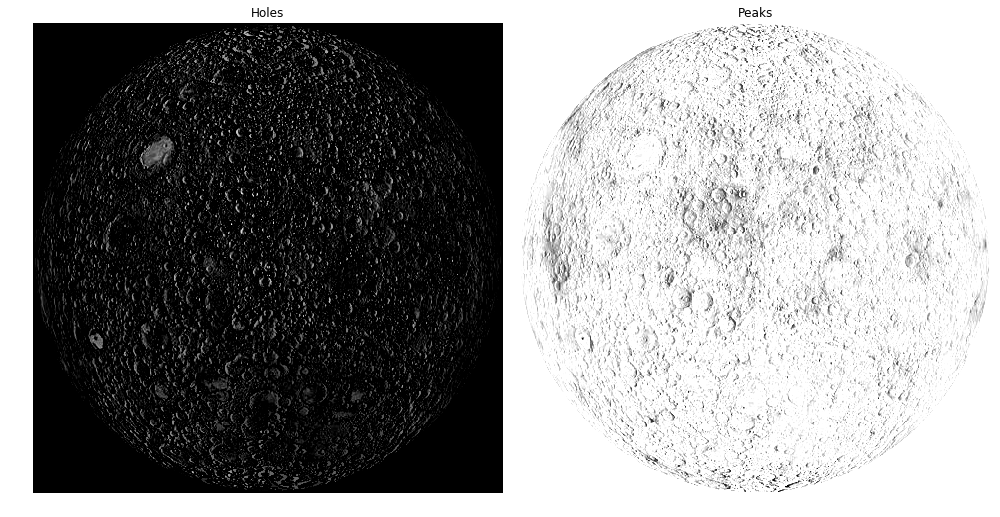

In [29]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(14, 12), 
                       sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(holes, cmap='gray') 
ax[0].set_title('Holes')
ax[0].axis('off')


ax[1].imshow(peaks, cmap='gray') 
ax[1].set_title('Peaks')
ax[1].axis('off')

plt.tight_layout()
plt.show()